## Z-score standardization

Imagine that you have two datasets your hands. The data describes the grades of students over the course of a year, but there is one issue: one dataset describes the grades of students from Brazil and the other describes grades of students from Poland.
The grading system in Brazil ranges from 0 to 10.
The grading system in Poland ranges from 1 to 6.

A student that scores 6 might be a good student in Poland, but not so good in Brazil. 
How can you compare things that are not measured in the same scale?
Yeah, you guessed correctly, Z-score standardization can help us.


$$ z = {x- \bar{x} \over S} $$

where:

- ${\displaystyle {\bar {x}}}$ is the mean of the sample.
- $ S$  is the standard deviation of the sample.

The Z-score tells us how many standard deviations a datapoint is from the mean. This way we can brin values from different scales (independent of its scale) to the same unit: standard deviations away from the mean.

Let's try to calculate the Z-scores for the same scenario I shared above: different grading systems.



## 🐍 Python

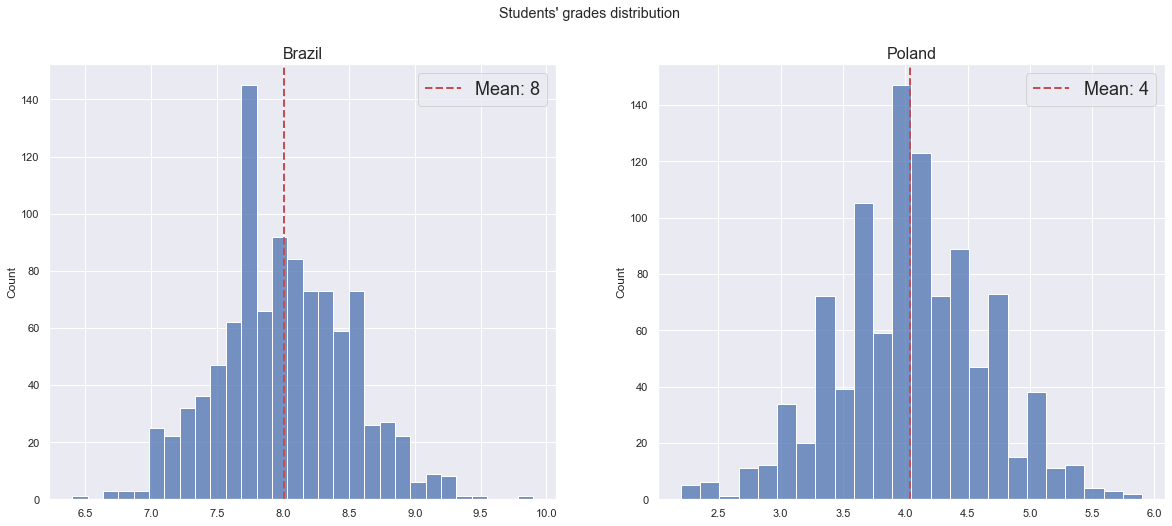

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
np.random.seed(42)

# Brazil
grades_brazil = np.random.normal(8,0.5, 1000).round(1)
mean_brazil = np.mean(grades_brazil)
std_brazil = np.std(grades_brazil)

# Poland
grades_poland = np.random.normal(4,0.6, 1000).round(1)
mean_poland = np.mean(grades_poland)
std_poland = np.std(grades_poland)


fig, (ax0,ax1) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle("Students' grades distribution")

sns.histplot(grades_brazil, ax=ax0)
ax0.set_title('Brazil', fontsize=16);
ax0.axvline(mean_brazil, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {int(mean_brazil)}")
ax0.legend(fontsize=18)

sns.histplot(grades_poland, ax=ax1)
ax1.set_title('Poland', fontsize=16);
ax1.axvline(mean_poland, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {int(mean_poland)}")
ax1.legend(fontsize=18);

Now if I ask you: a student that scores 8.5 in Brazil is a "better" student than a student that scores 5 in Poland? What would you say?

Let's standardize the datasets and bring both datasets to the same unit: standard deviations from the mean.

In [78]:
grades_brazil_standardized = (grades_brazil - mean_brazil) / std_brazil
grades_poland_standardized = (grades_poland - mean_poland) / std_poland

student_brazil_8_5 = grades_brazil_standardized[np.argmax(grades_brazil == 8.5)]
student_poland_5 = grades_poland_standardized[np.argmax(grades_poland == 5)]

print(f"The student from Brazil scored {student_brazil_8_5} standard deviations from the mean")
print(f"The student from Poland scored {student_poland_5} standard deviations from the mean")

The student from Brazil scored 1.0042857289175475 standard deviations from the mean
The student from Poland scored 1.6016703282076843 standard deviations from the mean


In this specific situation we can say that the student from Poland had a greater score than the student from Brazil even though the grading scales are different.

## 📚 Libraries

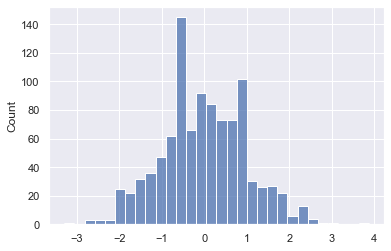

In [81]:
from scipy import stats

# We can use Scipy to easily calculate the Z-scores of a dataset
grades_brazil_standardized = stats.zscore(grades_brazil)
sns.histplot(grades_brazil_standardized);


### Observations about the Z-score:

- The Z-score assumes an approximate normal distribution. Since it depends on the mean and the standard deviation a datased that has high skewness or is bi-modal, for example, wouldn't be a good fit and the results would be difficul to interpret.

- The Z-score will not change the distribution of the data. The data is shifted and stretched, but the distribution keeps the same. Let's visualize it.

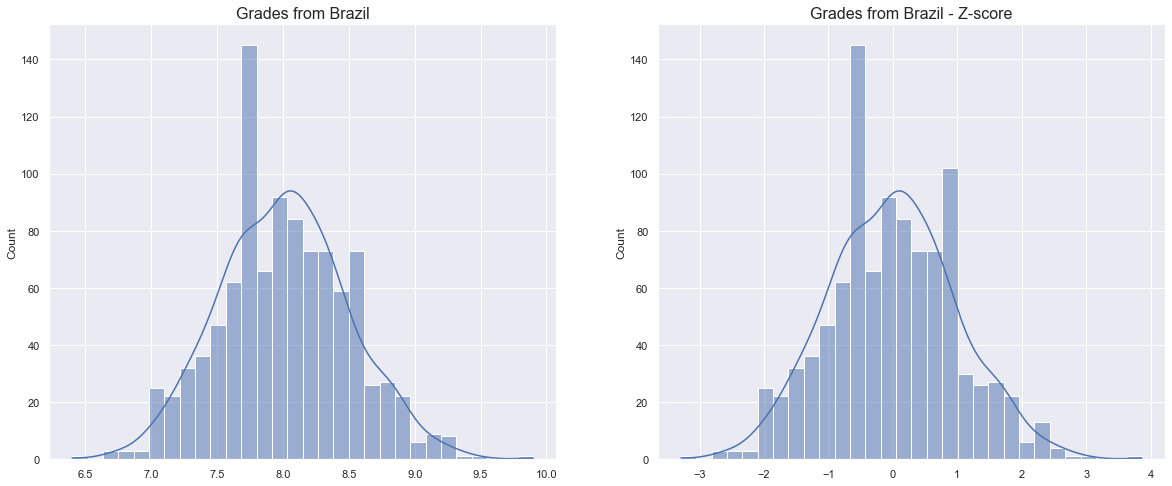

In [84]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(20,8))

sns.histplot(grades_brazil, ax=ax0, kde=True)
ax0.set_title('Grades from Brazil', fontsize=16);

sns.histplot(grades_brazil_standardized, ax=ax1, kde=True)
ax1.set_title('Grades from Brazil - Z-score', fontsize=16);

As you can see the scales are different, but the distribution is the same. The shape of the distribution is the same. Isn't it cool? 😎

- The original data and the standardized data should have a strong positive correlation, very close to 1:

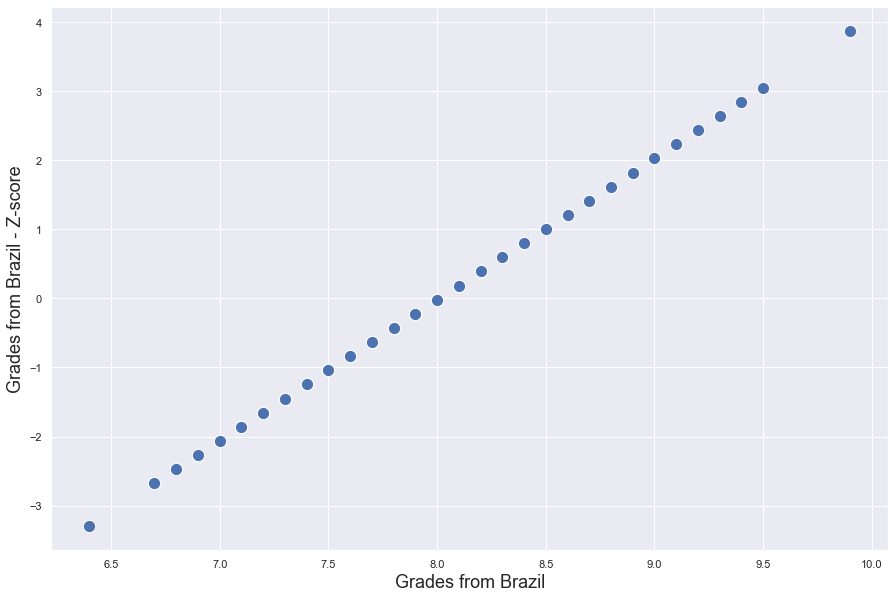

In [88]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.set_xlabel("Grades from Brazil", fontsize=18)
ax0.set_ylabel("Grades from Brazil - Z-score", fontsize=18)
sns.scatterplot(x=grades_brazil, y=grades_brazil_standardized, ax=ax0,s=150);

In [89]:
correlation_coef = np.corrcoef(grades_brazil,grades_brazil_standardized)
print(f"The correlation coefficient is: {correlation_coef[0][1]}")

The correlation coefficient is: 0.9999999999999993


## 📒 Notebook
The link for the notebook can be found [here](https://github.com/nathanqueija/statistics/blob/master/1_descriptive_statistics/1_mean.ipynb)